In [1]:
# root folder C:/Users/SergeyRyzhov/
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#chart style
plt.style.use('fivethirtyeight')
#preparing the data
resets = pd.read_csv("C:/Users/SergeyRyzhov/Downloads/JNB/demo_acc_resets_wrangled.csv")
resets['Datetime']=pd.to_datetime(resets['Datetime'])
resets['Operation month'] = resets['Datetime'].dt.to_period('M')
resets['Operation year']=resets['Datetime'].dt.year
resets['CreatedOn']=pd.to_datetime(resets['CreatedOn'])
resets['Created year']=resets['CreatedOn'].dt.year
resets.drop(['AccountID'], axis = 1, inplace = True)
#check if the owner performed the operation
resets['SelfService'] = False
resets['SelfService'].mask((resets['DemoOwner'] == resets['ResetterID']),True,inplace = True)
resets

,Unnamed: 0,OperationID,operation_type,Datetime,ResetterID,Account,Template,DemoOwner,DemoStart,Owner Name,Resetter Name,CreatedOn,DeletedOn,Operation month,Operation year,Created year,SelfService
0,0,224790,Reset to zero,2019-09-11,6201711,3079913,M&PS,0,NaN,NaN,NaN,NaT,NaN,2019-09,2019,NaN,False
1,1,226837,Reset to zero,2019-09-25,6201711,3112870,M&PS,0,NaN,NaN,NaN,NaT,NaN,2019-09,2019,NaN,False
2,2,226838,Reset to zero,2019-09-25,6201711,3112876,M&PS,3766163,2019-09-25,NaN,NaN,NaT,NaN,2019-09,2019,NaN,False
3,3,226840,Reset to zero,2019-09-25,6201711,3112974,M&PS,5595709,2019-09-25,NaN,NaN,NaT,NaN,2019-09,2019,NaN,False
4,4,226930,Reset to zero,2019-09-26,1388720,3114865,M&PS,0,NaN,NaN,NaN,NaT,NaN,2019-09,2019,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,5553,368696,Reset dates,2022-08-26,9672486,5367811,MDT,9672486,2022-02-22,Marcus Taveira,Marcus Taveira,2022-02-22,NaN,2022-08,2022,2022.0,True
5554,5554,368698,Reset to zero,2022-08-26,12386338,5291262,MDT,12386338,2022-01-11,James Pasquith,James Pasquith,2022-01-11,NaN,2022-08,2022,2022.0,True
5555,5555,368702,Reset dates,2022-08-26,11699319,5117045,MDT,11699319,2021-11-03,Brogan Pilkington,Brogan Pilkington,2021-11-03,NaN,2022-08,2022,2021.0,True
5556,5556,368711,Reset dates,2022-08-26,12162766,5229246,MDT,12162766,2021-12-13,Jose Cabada,Jose Cabada,2021-12-13,NaN,2022-08,2022,2021.0,True


In [65]:
#basic stats unders comments below to see number per account
resets_by_acc = resets.groupby(['Account','operation_type'])['OperationID'].count()
resets_by_acc.drop([0], inplace = True)
resets_by_acc = resets_by_acc.unstack(level = -1)
resets_by_acc.fillna(0, inplace = True)
#resets_by_acc.describe()
#resets_by_acc.median()

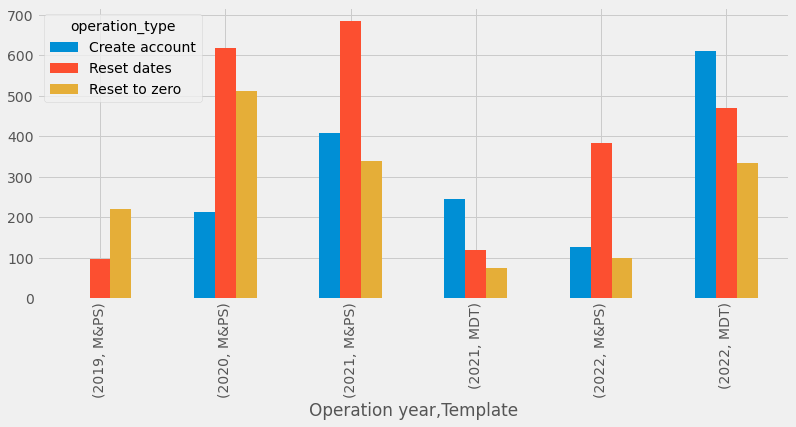

In [66]:
#basic stats on all operations by year
name = 'domain_operations_overview.png'
dom_ops_summary = resets.groupby(['Operation year','Template','operation_type'])['OperationID'].count()
dom_ops_summary = dom_ops_summary.unstack(level=-1).sort_values(by = ['Operation year'])
dom_ops_summary.plot(kind = 'bar', figsize = (12,5))
plt.savefig(name, dpi = 300, bbox_inches = 'tight')
plt.show()

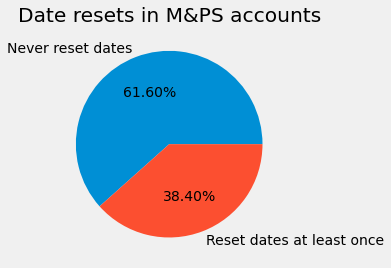

In [67]:
#pie for reset shares in M&PS
name = 'date_resets_share_MPS.png'
resets_mps = resets[resets['Template'] == 'M&PS']
resets_mps = resets_mps.groupby(['Account','operation_type'])['OperationID'].count()
resets_mps = resets_mps.unstack(level=-1)
resets_mps.drop(['Create account'], axis = 1, inplace = True)
resets_mps.fillna(0, inplace = True)
resets_mps.drop([0], inplace = True)
plt.title('Date resets in M&PS accounts')
plt.pie ([(len(resets_mps[resets_mps['Reset dates']==0])),(len(resets_mps[resets_mps['Reset dates']!=0]))], labels = ['Never reset dates','Reset dates at least once'], autopct = '%.2f%%')
plt.savefig(name, dpi = 300, bbox_inches = 'tight')
plt.show()

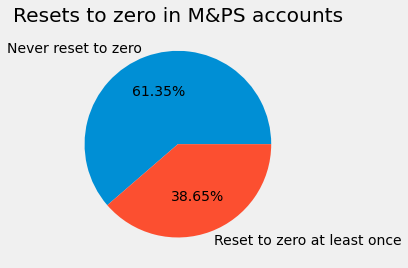

In [68]:
name = 'resets_to_zero_shares_MPS.png'
plt.title('Resets to zero in M&PS accounts')
plt.pie ([(len(resets_mps[resets_mps['Reset to zero']==0])),(len(resets_mps[resets_mps['Reset to zero']!=0]))], labels = ['Never reset to zero','Reset to zero at least once'], autopct = '%.2f%%')
plt.savefig(name, dpi = 300, bbox_inches = 'tight')
plt.show()

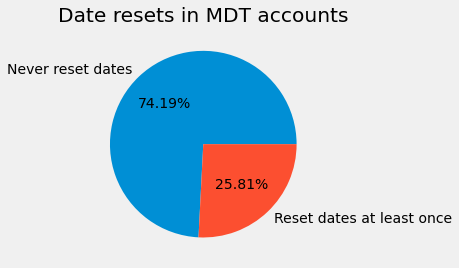

In [69]:
#pie for reset shares in MDT
name = 'date_resets_share_MDT.png'
resets_mdt = resets[resets['Template'] == 'MDT']
resets_mdt = resets_mdt.groupby(['Account','operation_type'])['OperationID'].count()
resets_mdt = resets_mdt.unstack(level=-1)
resets_mdt.drop(['Create account'], axis = 1, inplace = True)
resets_mdt.fillna(0, inplace = True)
resets_mdt.drop([0], inplace = True)
plt.title('Date resets in MDT accounts')
plt.pie ([(len(resets_mdt[resets_mdt['Reset dates']==0])),(len(resets_mdt[resets_mdt['Reset dates']!=0]))], labels = ['Never reset dates','Reset dates at least once'], autopct = '%.2f%%')
plt.savefig(name, dpi = 300, bbox_inches = 'tight')
plt.show()

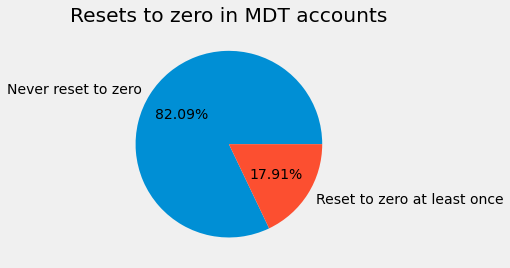

In [70]:
name = 'resets_to_zero_shares_MDT.png'
plt.title('Resets to zero in MDT accounts')
plt.pie ([(len(resets_mdt[resets_mdt['Reset to zero']==0])),(len(resets_mdt[resets_mdt['Reset to zero']!=0]))], labels = ['Never reset to zero','Reset to zero at least once'], autopct = '%.2f%%')
plt.savefig(name, dpi = 300, bbox_inches = 'tight')
plt.show()

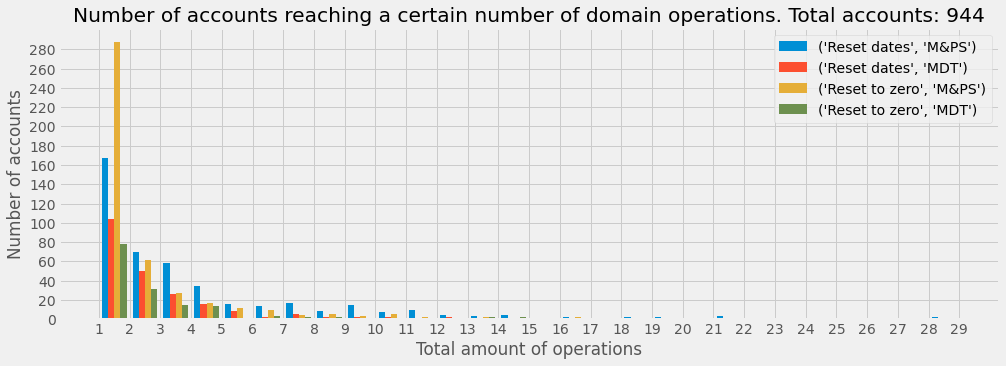

In [71]:
#look at domops frequency but remove zero first
demo_ops_freq = resets.groupby(['Account','Template','operation_type'])['OperationID'].count()
demo_ops_freq.drop([0], inplace = True)
demo_ops_freq = demo_ops_freq.unstack(level=-1)
demo_ops_freq.fillna(0, inplace = True)
demo_ops_freq.drop(['Create account'], axis = 1, inplace = True)
demo_ops_nonzero = demo_ops_freq[(demo_ops_freq['Reset dates'] + demo_ops_freq['Reset to zero']) >= 1]
demo_ops_nonzero = demo_ops_nonzero.unstack(level = -1)
demo_ops_nonzero.fillna(0, inplace = True)
#histogram for frequency
total = len(demo_ops_nonzero)
name = 'demo_operation_frequency.png'
plt.figure(figsize=(15,5))
plt.xticks(np.arange(1,30,1))
plt.yticks(np.arange(0,300,20))
plt.title ('Number of accounts reaching a certain number of domain operations. Total accounts: '+str(total))
plt.ylabel('Number of accounts')
plt.xlabel('Total amount of operations')
bins = np.arange(1,30,1)
plt.hist(demo_ops_nonzero,range = (1,30),bins=bins)
plt.legend(demo_ops_nonzero.columns)
plt.savefig(name, dpi = 300, bbox_inches = 'tight')
plt.show()

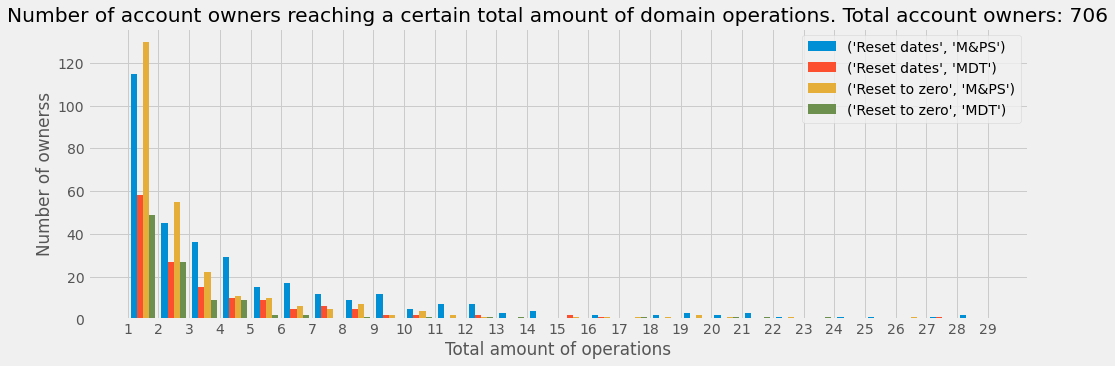

In [72]:
#domain operation by acc owner
domops_by_owner = resets.groupby(['DemoOwner','Template','operation_type'])['OperationID'].count()
domops_by_owner.drop([0], inplace = True)
domops_by_owner = domops_by_owner.unstack(level = -1)
domops_by_owner = domops_by_owner.drop('Create account', axis = 1)
domops_by_owner = domops_by_owner.fillna(0)
domops_by_owner = domops_by_owner.unstack(level = -1)
domops_by_owner = domops_by_owner.fillna(0)
#histogram for frequency
total = len(domops_by_owner)
name = 'dom_ops_by_owner.png'
plt.figure(figsize=(15,5))
plt.xticks(np.arange(1,30,1))
plt.yticks(np.arange(0,380,20))
plt.ylabel('Number of ownerss')
plt.xlabel('Total amount of operations')
plt.title ('Number of account owners reaching a certain total amount of domain operations. Total account owners: '+str(total))
bins = np.arange(1,30,1)
plt.hist(domops_by_owner,range = (1,30),bins=bins)
plt.legend(domops_by_owner.columns)
plt.savefig(name, dpi = 300, bbox_inches = 'tight')
plt.show()

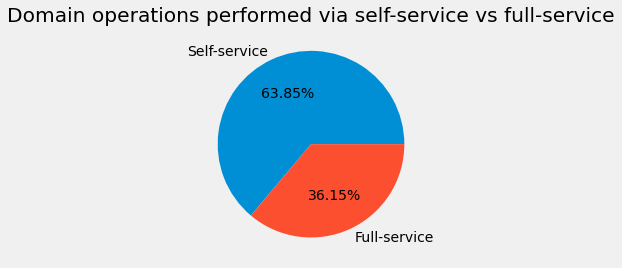

In [73]:
#self-service stats
name = 'self_service_pie.png'
plt.title('Domain operations performed via self-service vs full-service')
plt.pie([(len(resets[resets['SelfService']==True])),(len(resets[resets['SelfService']==False]))], labels = ['Self-service','Full-service'], autopct = '%.2f%%')
plt.savefig(name, dpi = 300, bbox_inches = 'tight')
plt.show()

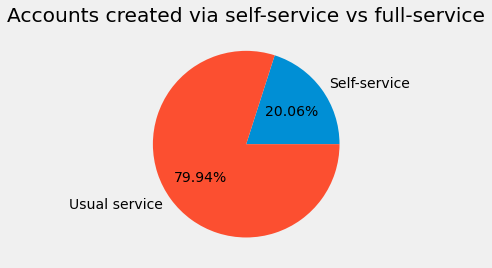

In [74]:
#self-service stats acc creation
name = 'self_service_acc_creation.png'
plt.title('Accounts created via self-service vs full-service')
resets2 = resets.loc[resets['operation_type']=='Create account']
plt.pie([(len(resets2[resets2['SelfService']==True])),(len(resets2[resets2['SelfService']==False]))], labels = ['Self-service','Usual service'], autopct = '%.2f%%')
plt.savefig(name, dpi = 300, bbox_inches = 'tight')
plt.show()

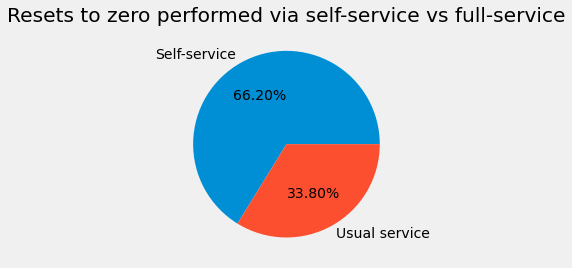

In [75]:
#self-service resets to zero
name = 'self_service_resets_zero.png'
plt.title('Resets to zero performed via self-service vs full-service')
resets2 = resets.loc[resets['operation_type']=='Reset to zero']
plt.pie([(len(resets2[resets2['SelfService']==True])),(len(resets2[resets2['SelfService']==False]))], labels = ['Self-service','Usual service'], autopct = '%.2f%%')
plt.savefig(name, dpi = 300, bbox_inches = 'tight')
plt.show()

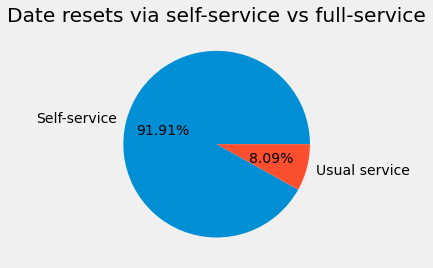

In [76]:
#self-service date resets
name = 'self_service_date_resets.png'
plt.title('Date resets via self-service vs full-service')
resets2 = resets.loc[resets['operation_type']=='Reset dates']
plt.pie([(len(resets2[resets2['SelfService']==True])),(len(resets2[resets2['SelfService']==False]))], labels = ['Self-service','Usual service'], autopct = '%.2f%%')
plt.savefig(name, dpi = 300, bbox_inches = 'tight')
plt.show()

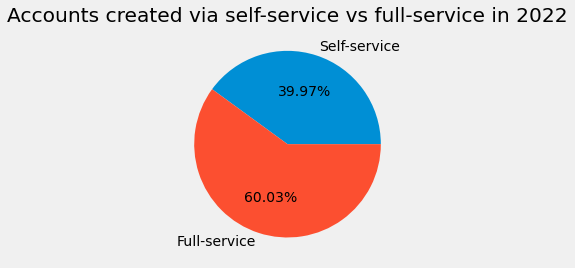

In [3]:
#self-service stats acc creation 2022
name = 'self_service_acc_creation_2022.png'
plt.title('Accounts created via self-service vs full-service in 2022')
resets2 = resets.loc[(resets['operation_type']=='Create account') & (resets['Operation year'] == 2022)]
plt.pie([(len(resets2[resets2['SelfService']==True])),(len(resets2[resets2['SelfService']==False]))], labels = ['Self-service','Full-service'], autopct = '%.2f%%')
plt.savefig(name, dpi = 300, bbox_inches = 'tight')
plt.show()

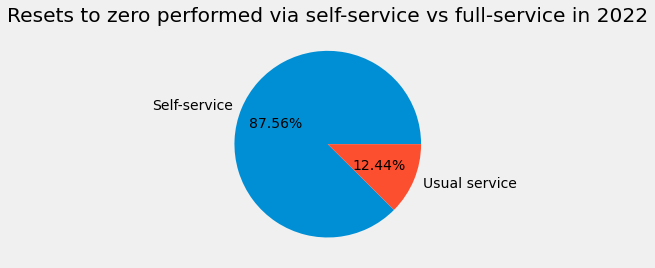

In [78]:
#self-service resets to zero 2022
name = 'self_service_resets_zero_2022.png'
plt.title('Resets to zero performed via self-service vs full-service in 2022')
resets2 = resets.loc[(resets['operation_type']=='Reset to zero') & (resets['Operation year'] == 2022)]
plt.pie([(len(resets2[resets2['SelfService']==True])),(len(resets2[resets2['SelfService']==False]))], labels = ['Self-service','Usual service'], autopct = '%.2f%%')
plt.savefig(name, dpi = 300, bbox_inches = 'tight')
plt.show()

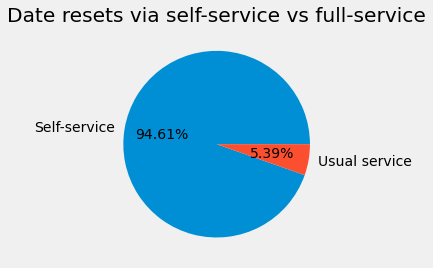

In [79]:
#self-service date resets 2022
name = 'self_service_date_resets_2022.png'
plt.title('Date resets via self-service vs full-service')
resets2 = resets.loc[(resets['operation_type']=='Reset dates') & (resets['Operation year'] == 2022)]
plt.pie([(len(resets2[resets2['SelfService']==True])),(len(resets2[resets2['SelfService']==False]))], labels = ['Self-service','Usual service'], autopct = '%.2f%%')
plt.savefig(name, dpi = 300, bbox_inches = 'tight')
plt.show()

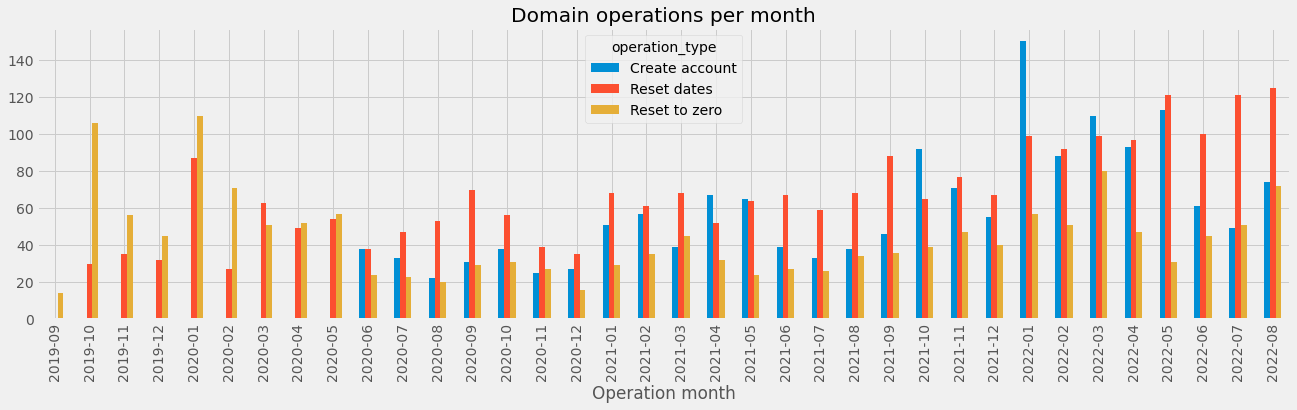

In [80]:
#basic stats on all operations by year-month
name = 'domain_operations_overview_monthly.png'
dom_ops_time = resets.groupby(['Operation month','operation_type'])['OperationID'].count()
dom_ops_time = dom_ops_time.unstack(level=-1).sort_values(by = ['Operation month'])
dom_ops_time.plot(kind = 'bar', figsize = (20,5))
plt.title('Domain operations per month')
plt.savefig(name, dpi = 300, bbox_inches = 'tight')
plt.show()

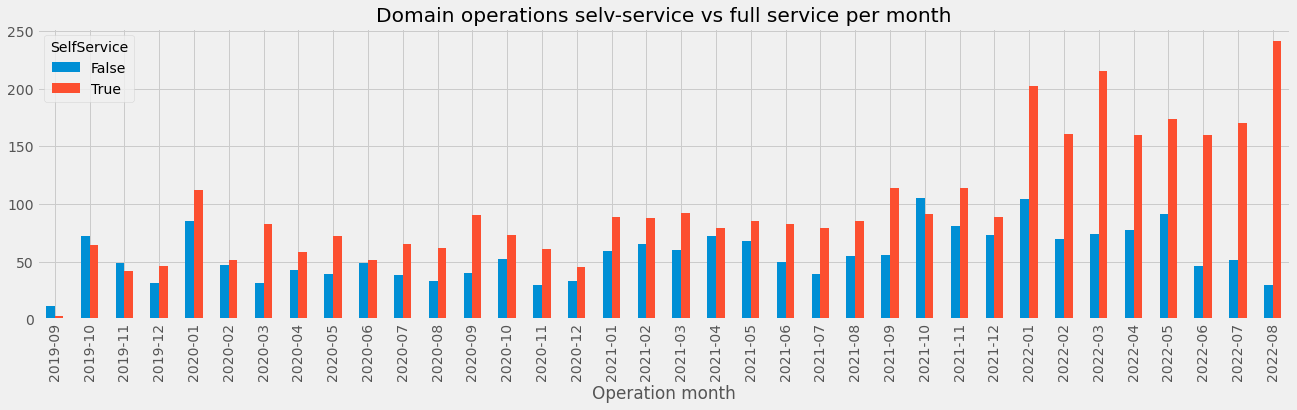

In [81]:
#stats of self-service vs full service over time
service_distribution_time = resets.groupby(['Operation month','SelfService'])['OperationID'].count()
service_distribution_time = service_distribution_time.unstack(level = -1)
service_distribution_time.fillna(0, inplace = True)
name = 'self_service_distribution_time.png'
service_distribution_time.plot(kind = 'bar', figsize = (20,5))
plt.title('Domain operations selv-service vs full service per month')
plt.savefig(name, dpi = 300, bbox_inches = 'tight')
plt.show()